In [1]:
import numpy as np
import pandas as pd

random_seed = np.random.RandomState(12)

*NumPy** - This is a Python package used for numerical computations. It is particularly useful when handling large data sets. The library provides support for arrays and matrices, along with a collection of mathematical functions to operate on these elements.


`np.random.RandomState(12)`. It is setting up a random number generator with a specified seed value of 12. Seeding a pseudo-random number generator gives it its first initial state, and will ensure the same sequence of random numbers are generated each time the code is run. This is good for reproducing results. Essentially, `RandomState` returns a new random number generator

In [2]:
# Generate a set of normal observations
X_train = 0.5 * random_seed.randn(500, 2)
X_train = np.r_[X_train + 3, X_train]
X_train = pd.DataFrame(X_train, columns=["x", "y"])

X_train = 0.5 * random_seed.randn(500, 2) creates a numpy array called `X_train` containing `500` rows and `2` columns of random values. Those random values are sampled from the “standard normal” distribution (a Gaussian distribution with a mean of `0` and standard deviation of `1`).

The `* 0.5` halves the standard deviation of the generated values, spreading them closer to the mean.

X_train = np.r_[X_train + 3, X_train] It first adds `3` to all the values in `X_train` then concatenates the result with the original `X_train` array.

`np.r_` is a numpy function to concatenate any number of array-like objects in sequence. The result is an array containing `1000` rows (`500` from the original `X_train` and `500` from the `X_train + 3`) and `2` columns, and this array is assigned back to `X_train`.

X_train = pd.DataFrame(X_train, columns=["x", "y"]) converts the numpy array `X_train` into a pandas DataFrame - a table-like data structure that's ideal for statistical and machine learning work.

In [3]:
# Generating a testing set

X_test = 0.5 * random_seed.randn(500, 2)
X_test = np.r_[X_test + 3, X_test]
X_test = pd.DataFrame(X_test, columns=["x", "y"])

In [4]:
X_outliers = random_seed.uniform(low=-5, high=5, size=(50, 2))
X_outliers = pd.DataFrame(X_outliers, columns=["x", "y"])

 `X_outliers = random_seed.uniform(low=-5, high=5, size=(50, 2))`:  is generating a 2-dimensional array of size 50 using the `uniform` function, which draws samples from a uniform distribution.

 The `low=-5` and `high=5` parameters set the interval for the possible values each sample can have, so each value in the generated array will be a random floating-point number between -5 and 5.

 2. `X_outliers = pd.DataFrame(X_outliers, columns=["x", "y"])`: converts the 2-dimensional array `X_outliers` into a pandas DataFrame, which is a 2-dimensional labeled data structure with columns of potentially different types. It is similar to a spreadsheet or SQL table, or a dict of Series objects. The `columns=["x", "y"]` part means that the DataFrame will have two columns labeled "x" and "y".

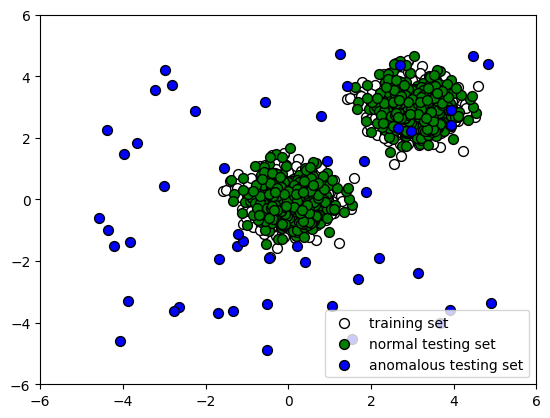

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt

p1 = plt.scatter(X_train.x, X_train.y, c="white", s=50, edgecolor="black")
p2 = plt.scatter(X_test.x, X_test.y, c="green", s=50, edgecolor="black")
p3 = plt.scatter(X_outliers.x, X_outliers.y, c="blue", s=50, edgecolor="black")
plt.xlim((-6, 6))
plt.ylim((-6, 6))
plt.legend(
    [p1, p2, p3],
    ["training set", "normal testing set", "anomalous testing set"],
    loc="lower right",
)

plt.show()

%matplotlib inline`: This is a magic function in IPython. It sets up IPython for interactive matplotlib plotting with inline, meaning the plots generated will be displayed immediately in the notebook.

2. `import matplotlib.pyplot as plt`:  imports the `pyplot` module of the `matplotlib` library and the module is aliased as `plt`. It is for convenience. The `pyplot` module has functions that can create graphic figures, create plotting area in a figure, plot lines in a plotting area, decorate the plot with labels, etc.

3. `p1 = plt.scatter(X_train.x, X_train.y, c="white", s=50, edgecolor="black")`:  creates a scatterplot using the "x" and "y" columns from the `X_train` dataframe. The data points are colored white (`c="white"`), they have a size of 50 (`s=50`), and their borders are colored black (`edgecolor="black"`). The plot is assigned to the variable `p1`.

4. `p2 = plt.scatter(X_test.x, X_test.y, c="green", s=50, edgecolor="black")`: Same as above, but with data points from the `X_test` dataframe and colored green.

5. `p3 = plt.scatter(X_outliers.x, X_outliers.y, c="blue", s=50, edgecolor="black")`: Same as above, but with data points from the `X_outliers` dataframe and colored blue.

6. `plt.xlim((-6, 6))` and `plt.ylim((-6, 6))`: These lines set the limits of the x and y axes of the plot, respectively, to be from -6 to 6.

7. The `plt.legend` function is used to Place a legend on the plot. The argument for this function specifies the plot elements to be added to the legend, the labels for these elements, and the location of the legend on the plot.

In [7]:
from sklearn.ensemble import IsolationForest

clf = IsolationForest()
clf.fit(X_train)
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
y_pred_outliers = clf.predict(X_outliers)

 `clf = IsolationForest()`: Here, an object/instance `clf` (short for "classifier") of the class `IsolationForest` is being created. The parenthesis `()` are empty, meaning that we are using default parameters for the IsolationForest model.

 - `clf.fit(X_train)`: The `fit` method is used to train (fit) the model with the training data `X_train`.- `y_pred_train = clf.predict(X_train)`: After the `clf` model has been trained, the `predict` method is applied to the training data `X_train`. The result, which is the model's predictions for the training data, is stored in `y_pred_train`.

 - `y_pred_test = clf.predict(X_test)`: The trained model is used to predict anomaly scores for the test data `X_test`. The result is saved in `y_pred_test`.

 - `y_pred_outliers = clf.predict(X_outliers)`: The trained model is also applied to predict anomaly scores on some new outlier sample set `X_outliers`. The result is saved in `y_pred_outliers`.The anomaly score of an input sample is computed as the mean anomaly score of the trees in the forest.

In [8]:
X_outliers = X_outliers.assign(pred=y_pred_outliers)
X_outliers.head()

,x,y,pred
0,3.947504,2.891003,-1
1,0.413976,-2.025841,-1
2,-2.644476,-3.480783,-1
3,-0.518212,-3.386443,-1
4,2.977669,2.215355,1


 `X_outliers.assign(` - The 'assign()' function is used to assign new columns to a dataframe, or to change the values of an existing column. - `pred=y_pred_outliers)` - A new column named 'pred' is being added, with its values set equal to the 'y_pred_outliers' variable.

 - `X_outliers.head()` - 'head()' is a function which returns the first 'n' rows for the object based on position

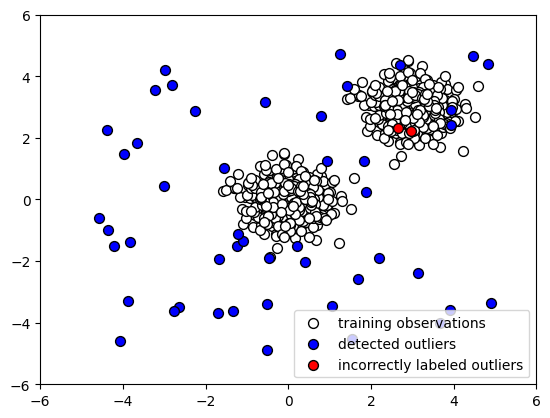

In [9]:
p1 = plt.scatter(X_train.x, X_train.y, c="white", s=50, edgecolor="black")
p2 = plt.scatter(
    X_outliers.loc[X_outliers.pred == -1, ["x"]],
    X_outliers.loc[X_outliers.pred == -1, ["y"]],
    c="blue",
    s=50,
    edgecolor="black",
)
p3 = plt.scatter(
    X_outliers.loc[X_outliers.pred == 1, ["x"]],
    X_outliers.loc[X_outliers.pred == 1, ["y"]],
    c="red",
    s=50,
    edgecolor="black",
)

plt.xlim((-6, 6))
plt.ylim((-6, 6))
plt.legend(
    [p1, p2, p3],
    ["training observations", "detected outliers", "incorrectly labeled outliers"],
    loc="lower right",
)

plt.show()

p1 = plt.scatter(X_train.x, X_train.y, c="white", s=50, edgecolor="black")`  plots the training data points with 'x' and 'y' coordinates from the `X_train` DataFrame, with the color of each point (`c`) set to white, the size (`s`) set to 50, and the edgecolor set to black.


- `p2 = plt.scatter( X_outliers.loc[X_outliers.pred == -1, ["x"]], X_outliers.loc[X_outliers.pred == -1, ["y"]], c="blue", s=50, edgecolor="black",)` plots the detected outliers, which are denoted by a prediction value of -1 (`pred == -1`) in the `X_outliers` DataFrame, in blue color.

- `p3 = plt.scatter( X_outliers.loc[X_outliers.pred == 1, ["x"]], X_outliers.loc[X_outliers.pred == 1, ["y"]], c="red", s=50, edgecolor="black",)` plots the incorrectly labeled outliers, which are denoted by a prediction value of 1 (`pred == 1`) in the `X_outliers` DataFrame, in red color.

`plt.xlim((-6, 6))` and `plt.ylim((-6, 6))` set the x and y-axis limits to be between -6 and 6.

`plt.legend( [p1, p2, p3], ["training observations", "detected outliers", "incorrectly labeled outliers"], loc="lower right",)`This line adds a legend to the plot in the lower right position, with labels for the three groups of points created earlier.d

In [10]:
X_test = X_test.assign(pred=y_pred_test)
X_test.head()

,x,y,pred
0,3.944575,3.866919,-1
1,2.984853,3.142150,1
2,3.501735,2.168262,-1
3,2.906300,3.233826,1
4,3.273225,3.261790,1


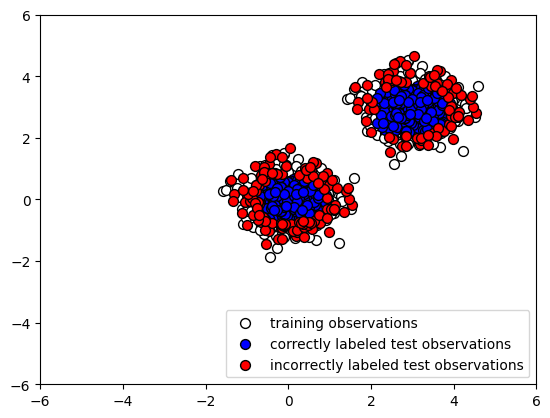

In [11]:
p1 = plt.scatter(X_train.x, X_train.y, c="white", s=50, edgecolor="black")
p2 = plt.scatter(
    X_test.loc[X_test.pred == 1, ["x"]],
    X_test.loc[X_test.pred == 1, ["y"]],
    c="blue",
    s=50,
    edgecolor="black",
)
p3 = plt.scatter(
    X_test.loc[X_test.pred == -1, ["x"]],
    X_test.loc[X_test.pred == -1, ["y"]],
    c="red",
    s=50,
    edgecolor="black",
)

plt.xlim((-6, 6))
plt.ylim((-6, 6))
plt.legend(
    [p1, p2, p3],
    [
        "training observations",
        "correctly labeled test observations",
        "incorrectly labeled test observations",
    ],
    loc="lower right",
)

plt.show()

Evidently, our Isolation Forest model performed quite well at capturing the anomalous points. There were quite a few false negatives (instances where normal points were classified as outliers), but by tuning our model's parameters, we may be able to reduce these.




The first step involves simply loading the necessary libraries that will allow us to manipulate data quickly and easily. Next, we generate a training and testing set consisting of normal observations. These have the same distributions. And then, we generate the remainder of our testing set by creating outliers. This anomalous dataset has a different distribution from the training data and the rest of the testing data. Plotting our data, we see that some outlier points look indistinguishable from normal points . This guarantees that our classifier will have a significant percentage of misclassifications, due to the nature of the data, and we must keep this in mind when evaluating its performance. Next, we fit an instance of Isolation Forest with default parameters to the training data.

Note that the algorithm is fed no information about the anomalous data. We use our trained instance of Isolation Forest to predict whether the testing data is normal or anomalous, and similarly to predict whether the anomalous data is normal or anomalous. To examine how the algorithm performs, we append the predicted labels to X_outliers  and then plot the predictions of the Isolation Forest instance on the outliers . We see that it was able to capture most of the anomalies. Those that were incorrectly labeled were indistinguishable from normal observations. Next, we append the predicted label to X_test in preparation for analysis and then plot the predictions of the Isolation Forest instance on the normal testing data . We see that it correctly labeled the majority of normal observations. At the same time, there was a significant number of incorrectly classified normal observations (shown in red).

Depending on how many false alarms we are willing to tolerate, we may need to fine-tune our classifier to reduce the number of false positives.